i. Perkenalan
Data set yang digunakan adalah dataset mengenai 721 Pokemon yang mencakup data sebagai berikut: *Pokemon Name, Pokemon ID, Pokemon Type, Total Stat, Pokemon HP, Pokemon Attack, Pokemon Defense, SP Atk, SP Def, and Speed* data didapatkan dalam bentuk (.csv) yang dishare melalui github

In [2]:
'''
ii. import pustaka yang dibutuhkan
List Libary yang digunakan dalam notebook ini
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
'''
iii. Data Loading
'''
#proses loading data ke dalam notebook
from google.colab import files
data_to_load = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Pokemon.csv']))

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [31]:
df.shape

(800, 13)

In [7]:
len(df)

800

In [8]:
pd.set_option("display.max.columns", None)

In [9]:
pd.set_option("display.precision", 2)

In [ ]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [47]:
print ('Kolom dari dataset terdiri dari:', df.columns)
print ('Bentuk dari dataset adalah:',df.shape)

Kolom dari dataset terdiri dari: Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
Bentuk dari dataset adalah: (800, 13)


In [12]:
rows_without_missing_data = df.dropna()
rows_without_missing_data.shape

(414, 13)

In [13]:
data_without_missing_columns = df.dropna(axis=1)
data_without_missing_columns.shape

(800, 12)

In [8]:
poke = df.copy()
poke.shape
poke.head(10)



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [9]:
'''
iv. Data Cleaning
'''
##adanya value berupa string yang tidak diperlukan sebelum kata 'Mega' seperti di iloc 3 dan iloc 769 harusnya Mega Venusaur saja dan mega diancie saja untuk itu saya akan menghilangkan str yang tidak diperlukan 
poke= poke.set_index('Name')
poke.index = poke.index.str.replace(".*(?=Mega)", "")
poke.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [10]:
#Mengubah data NaN menjadi NA pada column type2 pokemon
poke['Type 2'] = poke['Type 2'].fillna('N/A')
poke.head(15)


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,N/A,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,N/A,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [11]:
#menghapus kolom yang tidak digunakan yaitu "#"
poke=poke.drop(['#'],axis=1)
poke.head(5)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False


In [12]:
'''
v. Explorasi Data
'''
#Menampilkan Legendary Pokemon
poke[poke['Legendary']==True].head(10)


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,Psychic,N/A,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,Psychic,N/A,780,106,150,70,194,120,140,1,True
Raikou,Electric,N/A,580,90,85,75,115,100,115,2,True
Entei,Fire,N/A,580,115,115,85,90,75,100,2,True
Suicune,Water,N/A,580,100,75,115,90,115,85,2,True


In [76]:
#Menampilkan Pokemon Generasi 1 yang tidak Legendary
poke[(poke['Legendary']==False) & (poke['Generation']==1).head(10)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,N/A,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,N/A,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [17]:
#Menampilkan pokemon yang tidak mempunyai tipe kedua, speed diatas 50, dan Sp. Def kurang dari 100
poke[
     (poke["Type 2"]=="N/A") &
     (poke["Speed"] > 50) &
     (poke["Sp. Def"] < 100)
]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,N/A,405,58,64,58,80,65,80,1,False
Wartortle,Water,N/A,405,59,63,80,65,80,58,1,False
Rattata,Normal,N/A,253,30,56,35,25,35,72,1,False
Raticate,Normal,N/A,413,55,81,60,50,70,97,1,False
...,...,...,...,...,...,...,...,...,...,...,...
MeowsticMale,Psychic,N/A,466,74,48,76,83,81,104,6,False
MeowsticFemale,Psychic,N/A,466,74,48,76,83,81,104,6,False
Slurpuff,Fairy,N/A,480,82,80,86,85,75,72,6,False


In [19]:
# Menghitung total point setiap pokemon dan mengelompokkannya berdasarkan Type 1 
poke.groupby ("Type 1", sort= False)["Total"].sum()

Type 1
Grass       29480
Fire        23820
Water       48211
Bug         26146
Normal      39365
Poison      11176
Electric    19510
Ground      14000
Fairy        7024
Fighting    11244
Psychic     27129
Rock        19965
Ghost       14066
Ice         10403
Dragon      17617
Dark        13818
Steel       13168
Flying       1940
Name: Total, dtype: int64

In [27]:
#Menghitung pokemon dengan Type 2 'Dragon', Total lebih besar dari 500, dan mengelompokkannya dalam generasi dan status legendary pokemon tersebut
poke[
     (poke["Type 2"] == "Dragon") &
     (poke["Total"] > 500)
].groupby(["Generation", "Legendary"]).count()


,,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,Legendary,,,,,,,,,
1,False,1,1,1,1,1,1,1,1,1
2,False,2,2,2,2,2,2,2,2,2
3,False,2,2,2,2,2,2,2,2,2
4,True,4,4,4,4,4,4,4,4,4
5,False,1,1,1,1,1,1,1,1,1
6,False,2,2,2,2,2,2,2,2,2


In [31]:
#Mengelompokkan pokemon non legendary dengan power melebihi 600 dalam Type 1
poke[
     (poke["Legendary"] == False) &
     (poke["Total"] > 600)
].groupby(["Type 1"]).count()

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Dragon,2,2,2,2,2,2,2,2,2,2
Electric,1,1,1,1,1,1,1,1,1,1
Fighting,1,1,1,1,1,1,1,1,1,1
Fire,3,3,3,3,3,3,3,3,3,3
Grass,2,2,2,2,2,2,2,2,2,2
Normal,1,1,1,1,1,1,1,1,1,1
Psychic,2,2,2,2,2,2,2,2,2,2
Rock,2,2,2,2,2,2,2,2,2,2
Steel,3,3,3,3,3,3,3,3,3,3


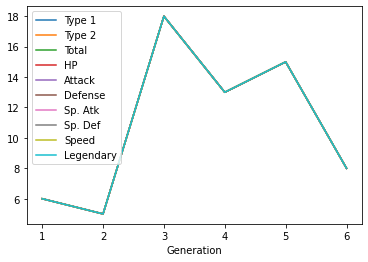

In [34]:
#Menampilkan jumlah pokemon legendary pada setiap generasi
%matplotlib inline
poke[poke["Legendary"] == True].groupby(["Generation"]).count().plot()

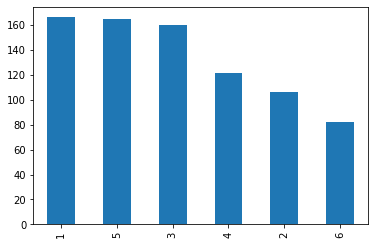

In [41]:
#Menampilkan jumlah pokemon setiap generasi dalam bentuk bar
poke["Generation"].value_counts().head(20).plot(kind="bar")

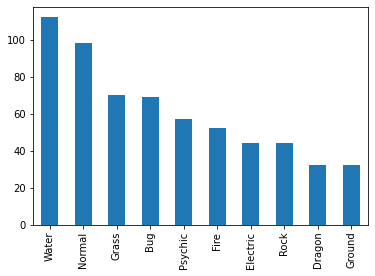

In [46]:
#Menampilkan jumlah pokemon masing masing tipe dalam bentuk bar plot
poke["Type 1"].value_counts().head(10).plot(kind="bar")

In [ ]:
'''
vi. Pengambilan kesimpulan
Setelah mengolah data menggunakan pandas dapat disimpulkan bahwa jumlah pokemon terbanyak dihasilkan oleh Pokemon Generasi 1; dari 6 generasi pokemon, Tipe 1 Water memliki jumlah pokemon terbanyak disusul oleh Tipe 1 Normal dan Tipe 1 Grass; Value total pokemon legendary lebih sedikit dibandingkan non-legendary karena jumlah pokemon legendary lebih sedikit dibandingkan pokemon legendary
'''